# `n_gaussians` experiment

In [3]:
%matplotlib inline

import pickle
import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 15})

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
# `/data/images/Orion.cont.image.fits`

/home/martin/miniconda3/lib/python3.7/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


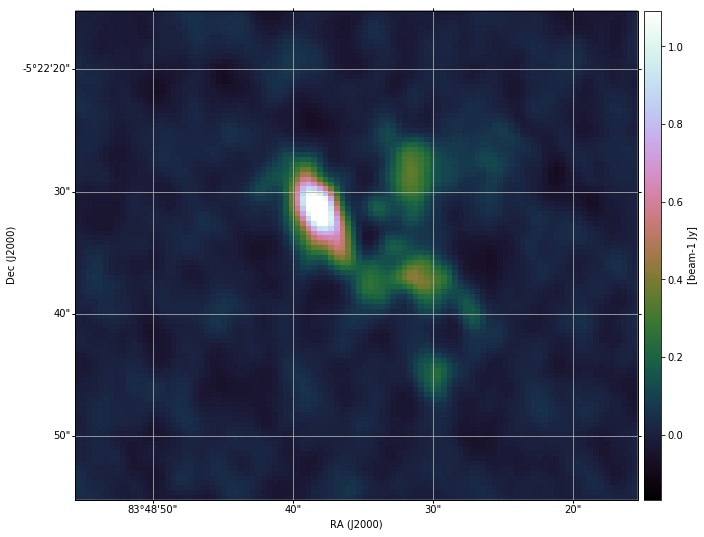

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

#data,wcs,hdu,spec = load_data(fits_path)

loaded_fits = load_data(fits_path)
data = loaded_fits["data"]
hdu = loaded_fits["hdu"]
wcs = loaded_fits["wcs"]
spec = loaded_fits["spec"]
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

In [28]:
results_orionKL = list()
n_gaussians_list = np.arange(50, 501, 25)

for n_gaussians in n_gaussians_list:
    hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_gaussians=n_gaussians, eps=100., kappa=2)
    hdmc.build_gmr()
    # obtaining stats
    (rmsR, infR, _, nfa, nfl) = hdmc.get_residual_stats(verbose=False)
    et = hdmc.elapsed_time
    results_orionKL.append({"rmsR":rmsR, "infR":infR, "nfa":nfa, "nfl":nfl, "et":et})

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 6.675567423230974%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.021041933611733947
Inf norm of residual: 0.07215012390881902
Variance of residual: 0.0004152190208985708
Normalized flux addition: 0.07106727668385254
Normalized flux lost: 0.035930728153407844


[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 10.013351134846461%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01797628029607146
Inf norm of residual: 0.0734491157241633
Variance of residual: 0.0002999421

TypeError: Improper input: N=850 must not exceed M=806

In [29]:
with open('exp-n_gaussians-orionKL.pickle', 'wb') as handle:
    pickle.dump(results_orionKL, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

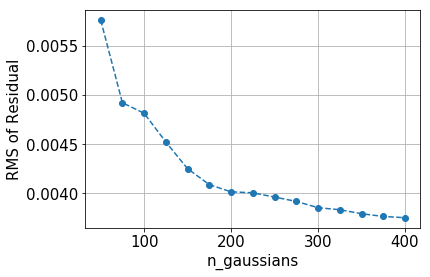

In [43]:
rmsR_list = []
for res in results_orionKL:
    rmsR_list.append(res["rmsR"])

plt.plot(n_gaussians_list[0:15], rmsR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("RMS of Residual")
plt.grid()
#plt.legend(loc="best")
plt.show()

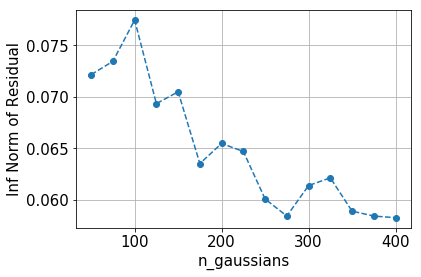

In [44]:
infR_list = []
for res in results_orionKL:
    infR_list.append(res["infR"])

plt.plot(n_gaussians_list[0:15], infR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Inf Norm of Residual")
plt.grid()
plt.show()

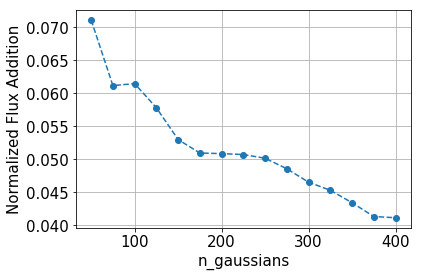

In [46]:
nfa_list = []
for res in results_orionKL:
    nfa_list.append(res["nfa"])

plt.plot(n_gaussians_list[0:15], nfa_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Addition")
plt.grid()
plt.show()

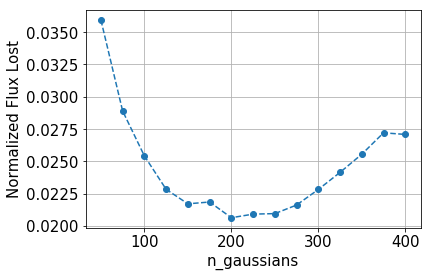

In [47]:
nfl_list = []
for res in results_orionKL:
    nfl_list.append(res["nfl"])

plt.plot(n_gaussians_list[0:15], nfl_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Lost")
plt.grid()
plt.show()

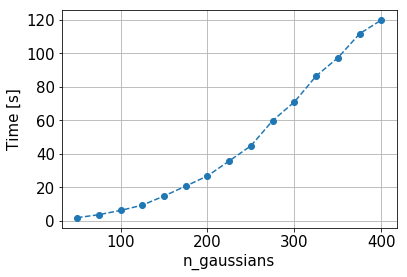

In [48]:
et_list = []
for res in results_orionKL:
    et_list.append(res["et"])

plt.plot(n_gaussians_list[0:15], et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

In [ ]:
et_list = []
for res in results_orionKL:
    et_list.append(res["et"])

plt.plot(n_gaussians_list[0:15], et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

***
***

# `/data/SCIMES/orion_12CO_mom0.fits`

FITS not compatible with SpectralCube, loaded with AstroPy.


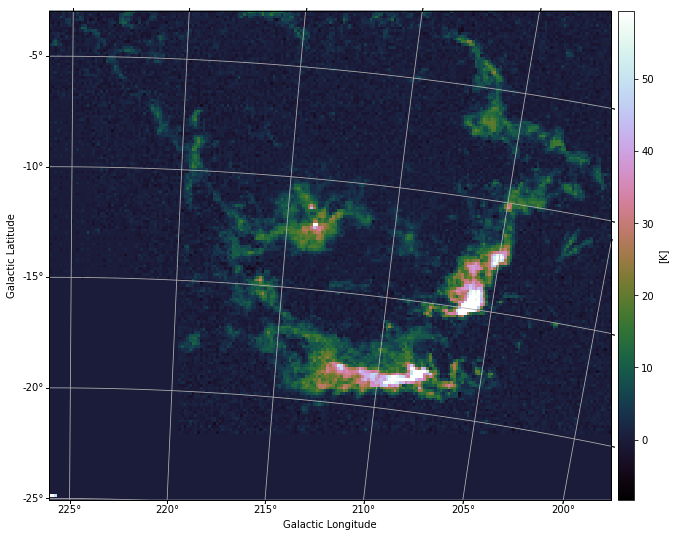

In [2]:
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

loaded_fits = load_data(fits_path)
data = loaded_fits["data"]
hdu = loaded_fits["hdu"]
wcs = loaded_fits["wcs"]

base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [3]:
results_orionMono = list()
n_gaussians_list = np.arange(50, 501, 25)

for n_gaussians in n_gaussians_list:
    print("NUMBER OF GAUSSIANS:", n_gaussians)
    hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=False, n_gaussians=n_gaussians, eps=100., kappa=1)
    hdmc.build_gmr()
    # obtaining stats
    (rmsR, infR, _, nfa, nfl) = hdmc.get_residual_stats(verbose=False)
    et = hdmc.elapsed_time
    results_orionMono.append({"rmsR":rmsR, "infR":infR, "nfa":nfa, "nfl":nfl, "et":et})

NUMBER OF GAUSSIANS: 50
[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 0.8315316813570598%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.03766159789376963
Inf norm of residual: 0.42137210152245347
Variance of residual: 0.0013975659593575352
Normalized flux addition: 0.1333029377907415
Normalized flux lost: 0.19745944149312178


NUMBER OF GAUSSIANS: 75
[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 1.2472975220355895%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.038679402081316996
Inf norm of residual: 0.

In [4]:
with open('exp-n_gaussians-orionMonoceros.pickle', 'wb') as handle:
    pickle.dump(results_orionMono, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

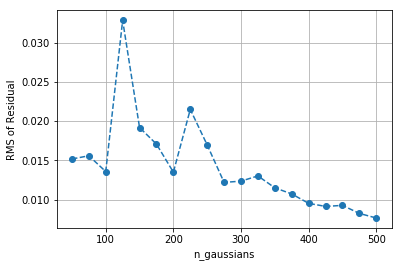

In [5]:
rmsR_list = []
for res in results_orionMono:
    rmsR_list.append(res["rmsR"])

plt.plot(n_gaussians_list, rmsR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("RMS of Residual")
plt.grid()
#plt.legend(loc="best")
plt.show()

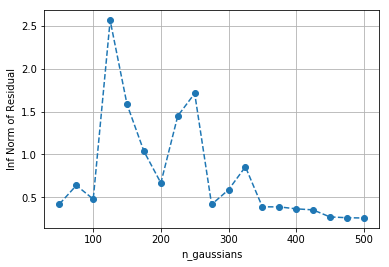

In [7]:
infR_list = []
for res in results_orionMono:
    infR_list.append(res["infR"])

plt.plot(n_gaussians_list, infR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Inf Norm of Residual")
plt.grid()
plt.show()

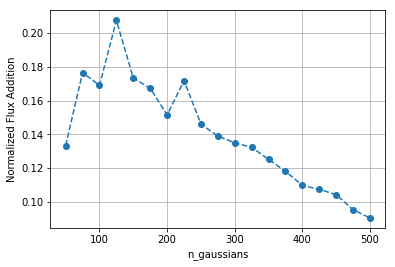

In [8]:
nfa_list = []
for res in results_orionMono:
    nfa_list.append(res["nfa"])

plt.plot(n_gaussians_list, nfa_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Addition")
plt.grid()
plt.show()

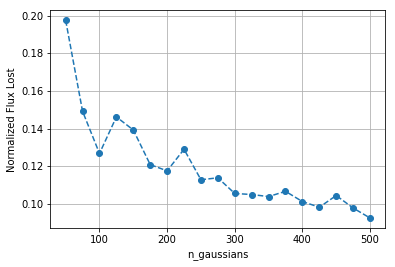

In [10]:
nfl_list = []
for res in results_orionMono:
    nfl_list.append(res["nfl"])

plt.plot(n_gaussians_list, nfl_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Lost")
plt.grid()
plt.show()

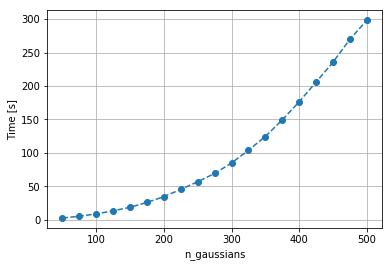

In [22]:
et_list = []
for res in results_orionMono:
    et_list.append(res["et"])

plt.plot(n_gaussians_list, et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

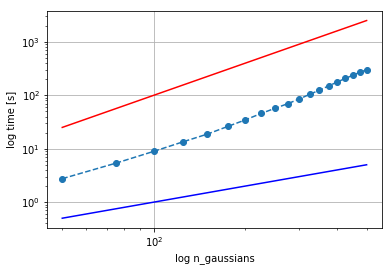

In [21]:
et_list = []
for res in results_orionMono:
    et_list.append(res["et"])

plt.loglog(n_gaussians_list, et_list, "o--")
plt.loglog(n_gaussians_list, 10e-3*linear, "b-")
plt.loglog(n_gaussians_list, 10e-3*quad, "r-")
plt.xlabel("log n_gaussians")
plt.ylabel("log time [s]")
plt.grid()
plt.show()

***
### Again but splitting data in ICEs

In [23]:
results_orionMonoICE = list()
n_gaussians_list = np.arange(50, 501, 25)

for n_gaussians in n_gaussians_list:
    print("NUMBER OF GAUSSIANS:", n_gaussians)
    hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=False, n_gaussians=n_gaussians, kappa=1)
    hdmc.build_gmr()
    # obtaining stats
    (rmsR, infR, _, nfa, nfl) = hdmc.get_residual_stats(verbose=False)
    et = hdmc.elapsed_time
    results_orionMonoICE.append({"rmsR":rmsR, "infR":infR, "nfa":nfa, "nfl":nfl, "et":et})

NUMBER OF GAUSSIANS: 50
[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 0.8315316813570598%
[INFO] Number of ICEs: 14
Isolated Cloud Entity A: 4359 pixels of significant emission.
Isolated Cloud Entity B: 44 pixels of significant emission.
Isolated Cloud Entity C: 31 pixels of significant emission.
Isolated Cloud Entity D: 41 pixels of significant emission.
Isolated Cloud Entity E: 169 pixels of significant emission.
Isolated Cloud Entity F: 71 pixels of significant emission.
Isolated Cloud Entity G: 295 pixels of significant emission.
Isolated Cloud Entity H: 743 pixels of significant emission.
Isolated Cloud Entity I: 27 pixels of significant emission.
Isolated Cloud Entity J: 34 pixels of significant emission.
Isolated Cloud Entity K: 120 pixels of significant emission.
Isolated Cloud Entity L: 21 pixels of significant emission.
Isolated Cloud Entity M: 24 pixels of significant emission.
Isolated Cloud Entity N: 34 pixels of significant emission.

In [24]:
with open('exp-n_gaussians-orionMonocerosICE.pickle', 'wb') as handle:
    pickle.dump(results_orionMonoICE, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

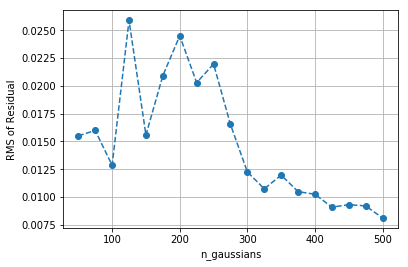

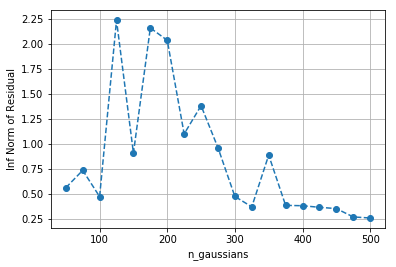

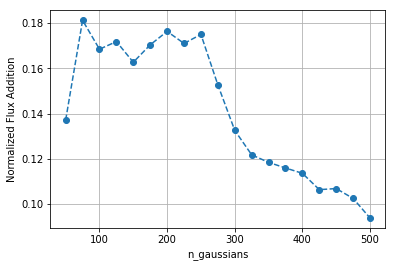

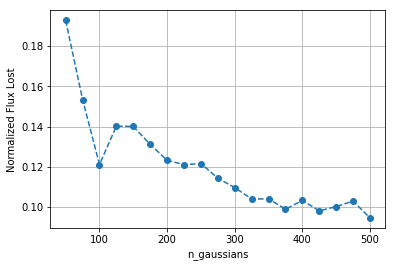

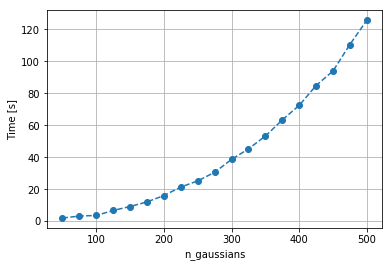

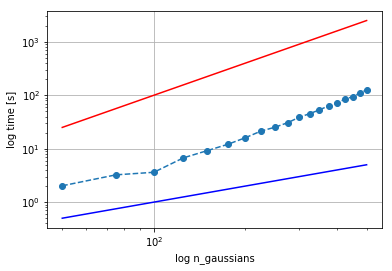

In [25]:
results_list = results_orionMonoICE

rmsR_list = []
for res in results_list:
    rmsR_list.append(res["rmsR"])

plt.plot(n_gaussians_list, rmsR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("RMS of Residual")
plt.grid()
plt.show()

infR_list = []
for res in results_list:
    infR_list.append(res["infR"])

plt.plot(n_gaussians_list, infR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Inf Norm of Residual")
plt.grid()
plt.show()

nfa_list = []
for res in results_list:
    nfa_list.append(res["nfa"])

plt.plot(n_gaussians_list, nfa_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Addition")
plt.grid()
plt.show()

nfl_list = []
for res in results_list:
    nfl_list.append(res["nfl"])

plt.plot(n_gaussians_list, nfl_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Lost")
plt.grid()
plt.show()

et_list = []
for res in results_list:
    et_list.append(res["et"])

plt.plot(n_gaussians_list, et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

et_list = []
for res in results_list:
    et_list.append(res["et"])

plt.loglog(n_gaussians_list, et_list, "o--")
plt.loglog(n_gaussians_list, 10e-3*linear, "b-")
plt.loglog(n_gaussians_list, 10e-3*quad, "r-")
plt.xlabel("log n_gaussians")
plt.ylabel("log time [s]")
plt.grid()
plt.show()

***

# `Orion.methanol.cbc.contsub.image.fits`

In [4]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
loaded_fits = load_data(fits_path)
data = loaded_fits["data"]
hdu = loaded_fits["hdu"]
wcs = loaded_fits["wcs"]
spec = loaded_fits["spec"]

print(wcs)
print("\nShape of array:", data.shape)

/home/martin/miniconda3/lib/python3.7/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


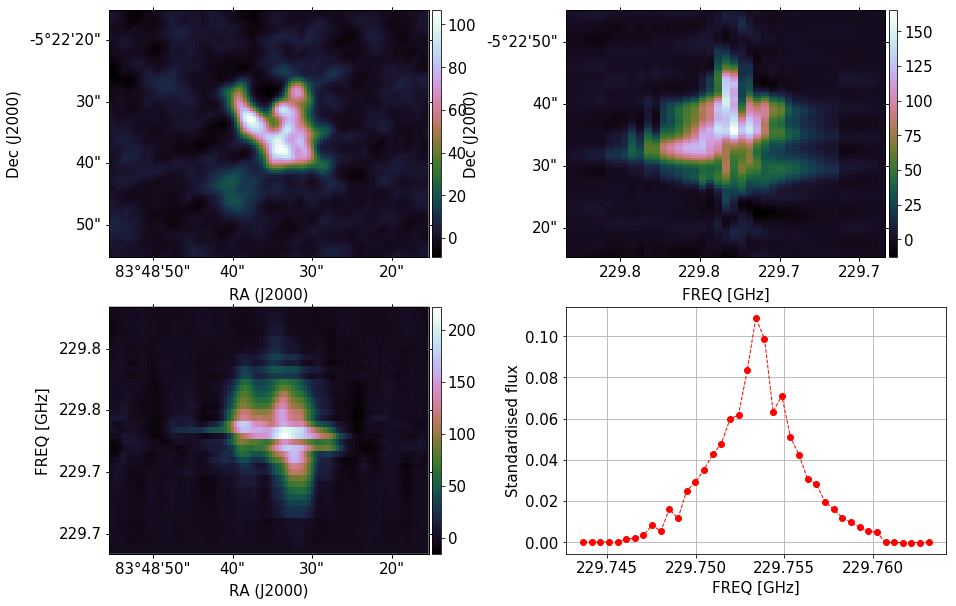

In [5]:
cube_plot(data, wcs=wcs, freq=spec)

In [ ]:
tic = time.time()
back_level = estimate_rms(data)
results_orionKLcube = list()
n_gaussians_list = np.arange(250, 1001, 50)

for n_gaussians in n_gaussians_list:
    print("NUMBER OF GAUSSIANS:", n_gaussians)
    hdmc = HDMClouds(data, freq=spec, back_level=back_level, wcs=wcs, verbose=False, n_gaussians=n_gaussians, kappa=1, eps=100)
    hdmc.build_gmr()
    # obtaining stats
    (rmsR, infR, _, nfa, nfl) = hdmc.get_residual_stats(verbose=False)
    et = hdmc.elapsed_time
    results_orionKLcube.append({"rmsR":rmsR, "infR":infR, "nfa":nfa, "nfl":nfl, "et":et})
    del hdmc
tac = time.time()    
total_elapsed_time = tac-tic

NUMBER OF GAUSSIANS: 250
[INFO] Number of pixels with significant emission: 17411
[INFO] Level of compression: 1.4358738728390097%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 17411 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.08558981118802506
Inf norm of residual: 0.7887601896744674
Variance of residual: 0.007304585712493686
Normalized flux addition: 0.10253617680629046
Normalized flux lost: 0.08832006913406829


NUMBER OF GAUSSIANS: 300
[INFO] Number of pixels with significant emission: 17411
[INFO] Level of compression: 1.7230486474068119%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 17411 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.08231674599064616
Inf norm of residual

In [11]:
print("total elapsed time:", total_elapsed_time)

total elapsed time: 11439.179126501083


In [ ]:
with open('exp-n_gaussians-orionKLcube.pickle', 'wb') as handle:
    pickle.dump(results_orionKLcube, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

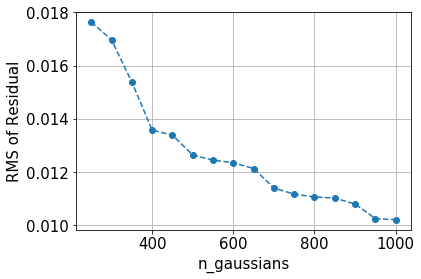

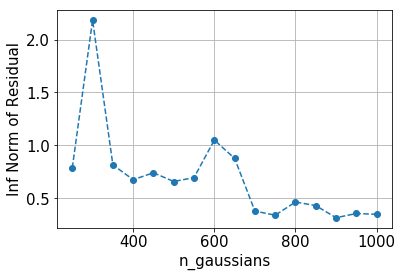

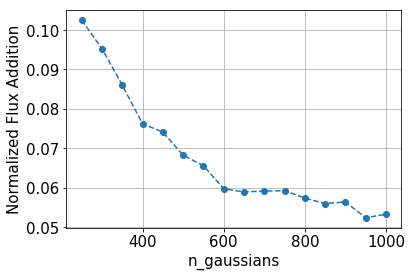

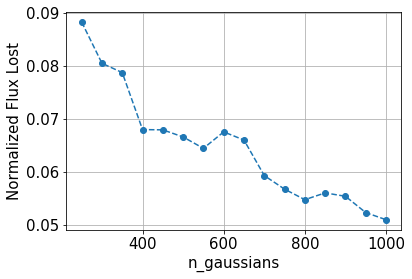

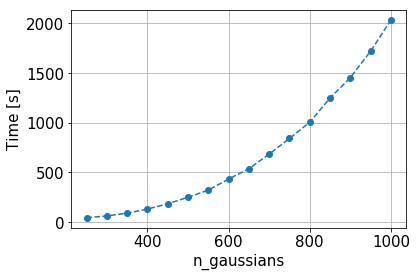

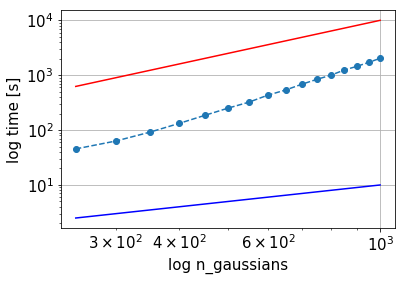

In [15]:
results_list = results_orionKLcube

rmsR_list = []
for res in results_list:
    rmsR_list.append(res["rmsR"])

plt.plot(n_gaussians_list, rmsR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("RMS of Residual")
plt.grid()
plt.show()

infR_list = []
for res in results_list:
    infR_list.append(res["infR"])

plt.plot(n_gaussians_list, infR_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Inf Norm of Residual")
plt.grid()
plt.show()

nfa_list = []
for res in results_list:
    nfa_list.append(res["nfa"])

plt.plot(n_gaussians_list, nfa_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Addition")
plt.grid()
plt.show()

nfl_list = []
for res in results_list:
    nfl_list.append(res["nfl"])

plt.plot(n_gaussians_list, nfl_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Normalized Flux Lost")
plt.grid()
plt.show()

et_list = []
for res in results_list:
    et_list.append(res["et"])

plt.plot(n_gaussians_list, et_list, "o--")
plt.xlabel("n_gaussians")
plt.ylabel("Time [s]")
plt.grid()
plt.show()

et_list = []
for res in results_list:
    et_list.append(res["et"])

linear = np.array(n_gaussians_list)
quad = linear**2
plt.loglog(n_gaussians_list, et_list, "o--")
plt.loglog(n_gaussians_list, 10e-3*linear, "b-")
plt.loglog(n_gaussians_list, 10e-3*quad, "r-")
plt.xlabel("log n_gaussians")
plt.ylabel("log time [s]")
plt.grid()
plt.show()

***